In [1]:
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Preparation**
---
## **1.1 Load Data**
---

In [2]:
# Import dataset from csv file
data = pd.read_csv('D:/Code Skripsi - RL and Ensemble/data/processed/no outliers.csv')

# Table check
data.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,41947875.0,55930500.0,13982625.0,27965250.0,25168725.0
AMT_CREDIT,84226672.13,267949042.9,27965250.0,64772179.88,106267950.0
AMT_ANNUITY,5116708.575,7394944.275,1398262.5,6149558.475,4529438.325
AMT_GOODS_PRICE,72709650.0,233975925.0,27965250.0,61523550.0,106267950.0


In [3]:
data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_EMPLOYED                 0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
NUM_BUREAU_LOANS              0
SUM_CREDIT                    0
AVG_CREDIT                    0
ACTIVE_LOANS                  0
OVERDUE_MONTHS                0
NUM_PREV

In [4]:
# Check the data shape
data.shape

(307511, 49)

In [5]:
# Define response variable
response_variable = 'TARGET'

# Check the proportion of response variable
data[response_variable].value_counts(normalize = True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [6]:
# Drop kolom SK_ID_CURR jika ada
if 'SK_ID_CURR' in data.columns:
    (data.drop(columns='SK_ID_CURR', inplace=True))

# **1.2 Data Exploration**
---
## **1.2.1 Exploratory Data Analysis (EDA)**,

In [7]:
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'NUM_BUREAU_LOANS', 'SUM_CREDIT', 'AVG_CREDIT', 'ACTIVE_LOANS',
       'OVERDUE_MONTHS', 'NUM_PREV_LOANS', 'SUM_PREV_CREDIT',
       'AVG_PREV_CREDIT', 'AMT_PAYMENT', 'CREDIT_INCOME_RATIO',
       'ANNUITY_INCOME_RATIO', 'CREDIT_ANNUITY_RATIO', 'CREDIT_GOODS_RATIO',
       'ANNUITY_GOODS_RATIO', 'PAYMENT_CREDIT_RATIO', 'YEARS_BIRTH',
       'EMPLOYMENT_TO_AGE_RATIO', 'CREDIT_TO_EMPLOYMENT_RATIO',
       'CREDIT_TO_AGE_RATIO', 'INCOME_PER_FAMILY_MEMBER',
       'CHILD_DEPENDENT_R

In [8]:
# Categorical features (tipe objek atau kategori)
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical features (tipe numerik: int, float)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Cetak hasilnya
print("Fitur Kategorikal:")
print(categorical_features)
print("\nFitur Numerikal:")
print(numerical_features)

Fitur Kategorikal:
['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

Fitur Numerikal:
['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'NUM_BUREAU_LOANS', 'SUM_CREDIT', 'AVG_CREDIT', 'ACTIVE_LOANS', 'OVERDUE_MONTHS', 'NUM_PREV_LOANS', 'SUM_PREV_CREDIT', 'AVG_PREV_CREDIT', 'AMT_PAYMENT', 'CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'CREDIT_ANNUITY_RATIO', 'CREDIT_GOODS_RATIO', 'ANNUITY_GOODS_RATIO', 'PAYMENT_CREDIT_RATIO', 'YEARS_BIRTH', 'EMPLOYMENT_TO_AGE_RATIO', 'CREDIT_TO_EMPLOYMENT_RATIO', 'CREDIT_TO_AGE_RATIO', 'INCOME_PER_FAMILY_MEMBER', 'CHILD_DEPENDENT_RATIO', 'HAS_CHILDREN', 'LOAN_TENURE']


In [9]:
cat_columns = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

num_columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'NUM_BUREAU_LOANS', 'SUM_CREDIT', 'AVG_CREDIT', 'ACTIVE_LOANS', 'OVERDUE_MONTHS', 'NUM_PREV_LOANS', 'SUM_PREV_CREDIT', 'AVG_PREV_CREDIT', 'AMT_PAYMENT', 'CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'CREDIT_ANNUITY_RATIO', 'CREDIT_GOODS_RATIO', 'ANNUITY_GOODS_RATIO', 'PAYMENT_CREDIT_RATIO', 'YEARS_BIRTH', 'EMPLOYMENT_TO_AGE_RATIO', 'CREDIT_TO_EMPLOYMENT_RATIO', 'CREDIT_TO_AGE_RATIO', 'INCOME_PER_FAMILY_MEMBER', 'CHILD_DEPENDENT_RATIO', 'HAS_CHILDREN', 'LOAN_TENURE']

## **1.2 Sample Splitting**
---

In [10]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns = [response_variable],
              axis = 1)

# Validate the splixtting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (307511,)
X shape : (307511, 47)


In [11]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (215257, 47)
y train shape : (215257,)
X test shape  : (92254, 47)
y test shape  : (92254,)


In [12]:
y_train.value_counts(normalize = True)

TARGET
0    0.919273
1    0.080727
Name: proportion, dtype: float64

In [13]:
y_test.value_counts(normalize = True)

TARGET
0    0.919266
1    0.080734
Name: proportion, dtype: float64

In [14]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train),
                       axis = 1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head()

Train data shape: (215257, 48)


,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,PAYMENT_CREDIT_RATIO,YEARS_BIRTH,EMPLOYMENT_TO_AGE_RATIO,CREDIT_TO_EMPLOYMENT_RATIO,CREDIT_TO_AGE_RATIO,INCOME_PER_FAMILY_MEMBER,CHILD_DEPENDENT_RATIO,HAS_CHILDREN,LOAN_TENURE,TARGET
159703,Cash loans,Y,Y,2,83895750.0,3.840561e+08,1.421940e+07,372870000.0,Unaccompanied,Commercial associate,...,0.003943,37.224658,-0.000511,3.894648e+08,9.852181e+06,16779150.00,0.40,1,27.009309,0
79269,Cash loans,N,Y,0,69913125.0,1.053348e+08,7.902047e+06,94149675.0,Family,State servant,...,0.091567,48.063014,-0.000405,1.074237e+08,2.191599e+06,23304375.00,0.00,0,13.330070,0
232615,Cash loans,N,Y,1,23304375.0,2.281685e+07,2.707036e+06,18643500.0,Unaccompanied,Commercial associate,...,0.381692,31.663014,-0.000553,2.322321e+07,7.206152e+05,5826093.75,0.25,1,8.792961,0
33420,Cash loans,N,Y,2,9321750.0,1.582833e+07,1.280808e+06,13982625.0,Unaccompanied,Commercial associate,...,0.122714,43.150685,-0.000545,1.640397e+07,3.668153e+05,2982960.00,0.40,1,12.358079,0
88191,Cash loans,Y,N,0,46608750.0,6.183676e+07,6.587681e+06,55930500.0,Unaccompanied,Commercial associate,...,0.117458,54.553425,-0.000356,6.306114e+07,1.133508e+06,15536250.00,0.00,0,9.386727,0


In [15]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [16]:
# 1. Pisahkan kembali X_train dan y_train dari data_train
X_train = data_train.drop(columns='TARGET')
y_train = data_train['TARGET']

In [17]:
# 2. Gabungkan kembali dengan X_test
X_full = pd.concat([X_train, X_test], axis=0)

In [18]:
# 3. Encoding kategorikal
X_encoded = pd.get_dummies(X_full, columns=cat_columns, drop_first=True)

In [19]:
# 4. Bagi kembali ke train dan test (berdasarkan ukuran asli)
X_train_encoded = X_encoded.iloc[:X_train.shape[0], :].copy()
X_test_encoded = X_encoded.iloc[X_train.shape[0]:, :].copy()

In [20]:
# Ulangi one-hot encoding dan bersihkan nama kolom
X_encoded = pd.get_dummies(X_full, columns=cat_columns, drop_first=True)

# Bersihkan nama kolom dari karakter yang tidak valid untuk LightGBM
X_encoded.columns = X_encoded.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

In [21]:
# Split kembali ke X_train_encoded dan X_test_encoded
X_train_encoded = X_encoded.iloc[:X_train.shape[0], :].copy()
X_test_encoded = X_encoded.iloc[X_train.shape[0]:, :].copy()

In [22]:
from imblearn.over_sampling import RandomOverSampler

# Buat objek RandomOverSampler
ros = RandomOverSampler(
    sampling_strategy="minority",  # atau float (0–1) jika ingin proporsi tertentu
    random_state=42
)

# Fit & resample
X_train_encoded, y_train = ros.fit_resample(X_train_encoded, y_train)

# **2. Model Training – LightGBM**
---

In [23]:
n_pos = y_train.sum()
n_neg = len(y_train) - n_pos
scale_pos_weight = n_neg / n_pos
print(f"Positive class: {n_pos:.0f}, Negative class: {n_neg:.0f}, "
      f"scale_pos_weight ≈ {scale_pos_weight:.2f}")

Positive class: 197880, Negative class: 197880, scale_pos_weight ≈ 1.00


# Inisialisasi & pelatihan model
---

In [24]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier(
    n_estimators      = 926,
    learning_rate     = 0.09913462872002565,
    num_leaves        = 48,
    min_data_in_leaf  = 27,
    feature_fraction  = 0.8243966895120785,
    bagging_fraction  = 0.7363089031327537,
    bagging_freq      = 3,
    scale_pos_weight  = scale_pos_weight,   # aktifkan koreksi imbalance
    objective         = 'binary',
    metric            = 'auc',
    n_jobs            = -1,
    random_state      = 42
)

In [25]:
lgb_clf.fit(X_train_encoded, y_train,
            eval_set=[(X_test_encoded, y_test)],
            eval_metric='auc',
            # verbose=False
            )

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8243966895120785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8243966895120785
[LightGBM] [Warning] bagging_fraction is set=0.7363089031327537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7363089031327537
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8243966895120785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8243966895120785
[LightGBM] [Warning] bagging_fraction is set=0.7363089031327537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7363089031327537
[LightGBM] [Warning] bagging_freq is set=3, su

LGBMClassifier(bagging_fraction=0.7363089031327537, bagging_freq=3,
               feature_fraction=0.8243966895120785,
               learning_rate=0.09913462872002565, metric='auc',
               min_data_in_leaf=27, n_estimators=926, n_jobs=-1, num_leaves=48,
               objective='binary', random_state=42,
               scale_pos_weight=np.float64(1.0))

# Evaluasi di test set

In [26]:
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, accuracy_score
)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Probabilitas & prediksi kelas (threshold default 0.5)
y_proba = lgb_clf.predict_proba(X_test_encoded)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8243966895120785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8243966895120785
[LightGBM] [Warning] bagging_fraction is set=0.7363089031327537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7363089031327537
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


In [28]:
# Confusion matrix (1 = positif/defaulters di baris 0)
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
TP, FN, FP, TN = cm.ravel()

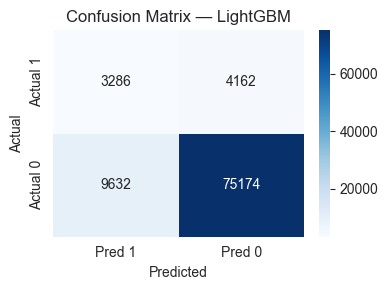

In [29]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm,
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 1', 'Pred 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.title("Confusion Matrix — LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [30]:
# Metrik
AUC   = roc_auc_score(y_test, y_proba)
TPR   = TP / (TP + FN) if (TP + FN) else 0      # Sensitivity / Recall
TNR   = TN / (TN + FP) if (TN + FP) else 0      # Specificity
FPR   = 1 - TNR
Gmean = np.sqrt(TPR * TNR)
ACC   = accuracy_score(y_test, y_pred)

In [31]:
metrics_df = pd.DataFrame(
    {
        "AUC"      : [AUC],
        "TPR"      : [TPR],
        "TNR"      : [TNR],
        "FP-Rate"  : [FPR],
        "G-Mean"   : [Gmean],
        "Accuracy" : [ACC],
    }
).round(4)

In [32]:
print("Kinerja di Test Set:")
metrics_df

Kinerja di Test Set:


,AUC,TPR,TNR,FP-Rate,G-Mean,Accuracy
0,0.7634,0.4412,0.8864,0.1136,0.6254,0.8505


# Menyimpan Hasil Model
---

In [33]:
from joblib import dump

model_path = "D:/Code Skripsi - RL and Ensemble/rumusan masalah 2/shap/models/lgbm_ros_credit_scoring.joblib"  # bebas ganti
dump(lgb_clf, model_path)
print(f"✅ Model disimpan ke: {model_path}")

✅ Model disimpan ke: D:/Code Skripsi - RL and Ensemble/rumusan masalah 2/shap/models/lgbm_ros_credit_scoring.joblib
